## Cargamos el dataset

In [1]:

#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargamos dataset a utilizar
df_entrada = pd.read_csv("../data/ds_gasto_5.csv", sep=";")

In [3]:
df_entrada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627803 entries, 0 to 627802
Data columns (total 36 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ANIO                              627803 non-null  int64  
 1   NIVEL                             627803 non-null  int64  
 2   NIVEL_GOBIERNO                    627803 non-null  object 
 3   DPTO                              627803 non-null  int64  
 4   DEPARTAMENTO_EJECUTORA_NOMBRE     627803 non-null  object 
 5   FUNCION                           627803 non-null  int64  
 6   FUNCION_NOMBRE                    627803 non-null  object 
 7   PIA                               627803 non-null  int64  
 8   PIM                               627803 non-null  int64  
 9   DEVENGADO                         627803 non-null  float64
 10  IP                                627803 non-null  float64
 11  CAMBIO_GOBIERNO_NACIONAL          627803 non-null  i

### NULL values -> costo_actualizado, monto_viable

In [4]:
df_entrada.isnull().sum()  

ANIO                                     0
NIVEL                                    0
NIVEL_GOBIERNO                           0
DPTO                                     0
DEPARTAMENTO_EJECUTORA_NOMBRE            0
FUNCION                                  0
FUNCION_NOMBRE                           0
PIA                                      0
PIM                                      0
DEVENGADO                                0
IP                                       0
CAMBIO_GOBIERNO_NACIONAL                 0
NRO_PRESIDENTES_X_ANO                    0
FENOMENO_NINO                            0
PANDEMIA                                 0
CAMBIO_GOBIERNO_REGIONAL_LOCAL           0
ELECCION_REGIONAL_LOCAL                  0
TIPO_GOBIERNO_NACIONAL                   0
NRO_CONFLICTO_SOCIAL_X_ANO               0
INFLACION_ANUAL                          0
PROYECTO                                 0
EJECUTORA                                0
PROYECTO_EDAD_NETA                       0
PROYECTO_ED

In [5]:
df_entrada_cleaned = df_entrada.dropna(subset=['MONTO_VIABLE'])

In [6]:
df_entrada_cleaned.isnull().sum()

ANIO                                0
NIVEL                               0
NIVEL_GOBIERNO                      0
DPTO                                0
DEPARTAMENTO_EJECUTORA_NOMBRE       0
FUNCION                             0
FUNCION_NOMBRE                      0
PIA                                 0
PIM                                 0
DEVENGADO                           0
IP                                  0
CAMBIO_GOBIERNO_NACIONAL            0
NRO_PRESIDENTES_X_ANO               0
FENOMENO_NINO                       0
PANDEMIA                            0
CAMBIO_GOBIERNO_REGIONAL_LOCAL      0
ELECCION_REGIONAL_LOCAL             0
TIPO_GOBIERNO_NACIONAL              0
NRO_CONFLICTO_SOCIAL_X_ANO          0
INFLACION_ANUAL                     0
PROYECTO                            0
EJECUTORA                           0
PROYECTO_EDAD_NETA                  0
PROYECTO_EDAD_BRUTA                 0
IGEIP_EJECUCION                     0
P_INCO_AVG                          0
NEJE_PUNTAJE

### Filtrar una funcion -> Transporte

In [84]:
df_entrada_cleaned[['FUNCION','FUNCION_NOMBRE']].value_counts()

FUNCION  FUNCION_NOMBRE                                 
15       TRANSPORTE                                         119449
18       SANEAMIENTO                                         83252
22       EDUCACION                                           80571
10       AGROPECUARIA                                        49523
21       CULTURA Y DEPORTE                                   41736
19       VIVIENDA Y DESARROLLO URBANO                        28569
3        PLANEAMIENTO, GESTION Y RESERVA DE CONTINGENCIA     27006
20       SALUD                                               21748
5        ORDEN PUBLICO Y SEGURIDAD                           19017
17       AMBIENTE                                            15950
12       ENERGIA                                             13124
23       PROTECCION SOCIAL                                    8653
9        TURISMO                                              3642
8        COMERCIO                                             3018
6    

In [154]:
df_filtro_x_funcion = df_entrada_cleaned.query('FUNCION_NOMBRE == "SALUD"')

## EXPLORACION

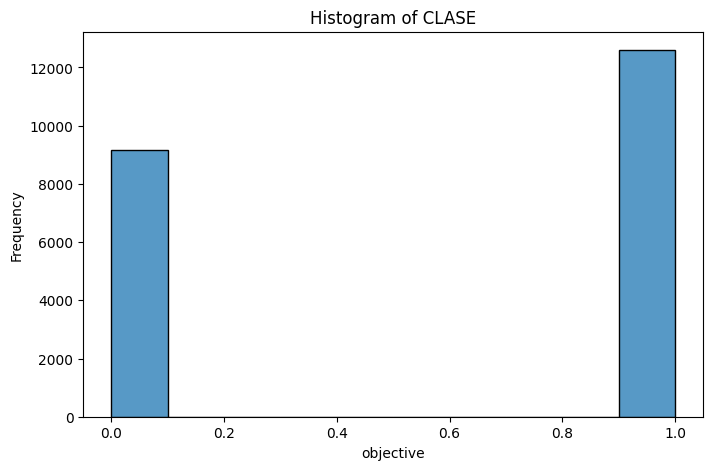

In [155]:
# Create a histogram for objective
plt.figure(figsize=(8, 5))
sns.histplot(df_filtro_x_funcion['CLASE'], bins=10, kde=False)
plt.xlabel('objective')
plt.ylabel('Frequency')
plt.title('Histogram of CLASE')
plt.show()

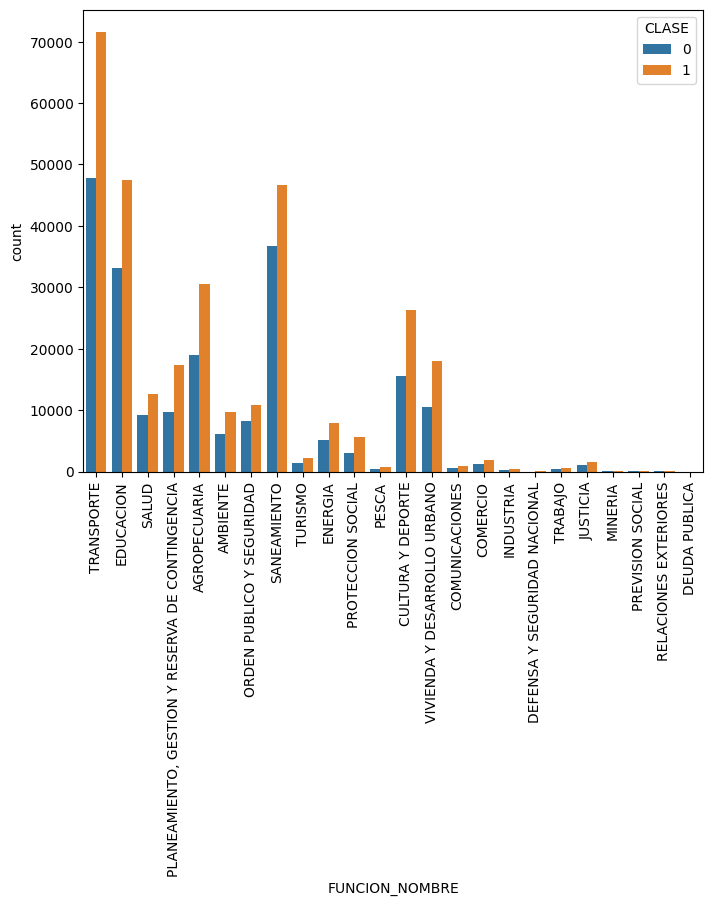

In [122]:
fig, ax = plt.subplots(figsize=(8, 6))  # Aumentamos el ancho para estirar horizontalmente
sns.countplot(
    data=df_entrada_cleaned,
    x='FUNCION_NOMBRE',
    hue='CLASE',
    #palette=sns.color_palette("tab10"),
    ax=ax
)
# Rotamos las etiquetas del eje x verticalmente
plt.xticks(rotation=90, ha='center')
# Ajustamos el diseño para que las etiquetas no se corten
#plt.tight_layout()
# Mostramos el gráfico
plt.show()

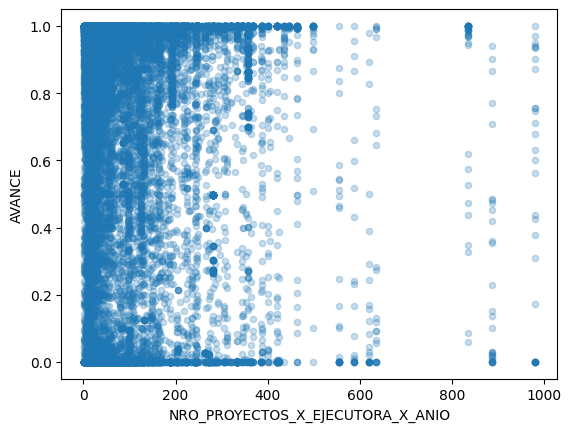

In [156]:
df_entrada_mayor_2021=df_entrada_cleaned.query('ANIO == 2019')
df_filtro_x_funcion.plot.scatter(x="NRO_PROYECTOS_X_EJECUTORA_X_ANIO", y="AVANCE", alpha=0.25)
#df_entrada.plot.scatter(x="PUNTAJE_INCO_EJECUTORA", y="AVANCE", alpha=0.1)
plt.show()
#IGEIP_EJECUCION
#NEJE_PUNTAJEIRI
#NRO_EJECUTORAS_X_PROYECTO
#P_INCO_AVG


# PREPARACION DE LOS DATOS

## DROP

In [157]:
col_to_drop = [ 'ANIO'
            ,'NIVEL_GOBIERNO'
            ,'DEPARTAMENTO_EJECUTORA_NOMBRE'
            ,'FUNCION_NOMBRE'
            ,'PIA'
            ,'DEVENGADO'
            ,'PROYECTO'
            ,'EJECUTORA'
            ,'AVANCE' 
            #,'CLASE'
            ,'FENOMENO_NINO' # IG muy bajo
            ,'CAMBIO_GOBIERNO_NACIONAL' # IG muy bajo
            ,'P_INCO_AVG' # Incluido en PUNTAJE_INCO_EJECUTORA
            ,'NEJE_PUNTAJEIRI' # Incluido en NPRY_PUNTAJEIRI
            ]
               
df_entrada_drop = df_filtro_x_funcion.drop(col_to_drop, axis='columns', inplace=False)

In [158]:
df_entrada_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21748 entries, 3435 to 623548
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NIVEL                             21748 non-null  int64  
 1   DPTO                              21748 non-null  int64  
 2   FUNCION                           21748 non-null  int64  
 3   PIM                               21748 non-null  int64  
 4   IP                                21748 non-null  float64
 5   NRO_PRESIDENTES_X_ANO             21748 non-null  int64  
 6   PANDEMIA                          21748 non-null  int64  
 7   CAMBIO_GOBIERNO_REGIONAL_LOCAL    21748 non-null  int64  
 8   ELECCION_REGIONAL_LOCAL           21748 non-null  int64  
 9   TIPO_GOBIERNO_NACIONAL            21748 non-null  object 
 10  NRO_CONFLICTO_SOCIAL_X_ANO        21748 non-null  int64  
 11  INFLACION_ANUAL                   21748 non-null  float64
 12  PROYE

## ONE HOT

In [159]:
# Aplicar one-hot encoding a 'columna1'
columns_to_one_hot_encode = ['NIVEL', 'TIPO_GOBIERNO_NACIONAL', 'DPTO'
                             #, 'FUNCION'
                             , 'MODALIDAD_EJECUCION']
df_one_hot = pd.get_dummies(df_entrada_drop, columns=columns_to_one_hot_encode, dtype=int)

In [160]:
(
    df_one_hot.rename(columns={'TIPO_GOBIERNO_NACIONAL_Centro derecha': 'tgn_centro_derecha',
                                'TIPO_GOBIERNO_NACIONAL_Centro izquierda': 'tgn_centro_izquierda',
                                'TIPO_GOBIERNO_NACIONAL_Izquierda': 'tgn_izquierda',
                                        }, inplace=True)
)

In [161]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21748 entries, 3435 to 623548
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FUNCION                              21748 non-null  int64  
 1   PIM                                  21748 non-null  int64  
 2   IP                                   21748 non-null  float64
 3   NRO_PRESIDENTES_X_ANO                21748 non-null  int64  
 4   PANDEMIA                             21748 non-null  int64  
 5   CAMBIO_GOBIERNO_REGIONAL_LOCAL       21748 non-null  int64  
 6   ELECCION_REGIONAL_LOCAL              21748 non-null  int64  
 7   NRO_CONFLICTO_SOCIAL_X_ANO           21748 non-null  int64  
 8   INFLACION_ANUAL                      21748 non-null  float64
 9   PROYECTO_EDAD_NETA                   21748 non-null  int64  
 10  PROYECTO_EDAD_BRUTA                  21748 non-null  int64  
 11  IGEIP_EJECUCION              

In [162]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21748 entries, 3435 to 623548
Data columns (total 54 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FUNCION                              21748 non-null  int64  
 1   PIM                                  21748 non-null  int64  
 2   IP                                   21748 non-null  float64
 3   NRO_PRESIDENTES_X_ANO                21748 non-null  int64  
 4   PANDEMIA                             21748 non-null  int64  
 5   CAMBIO_GOBIERNO_REGIONAL_LOCAL       21748 non-null  int64  
 6   ELECCION_REGIONAL_LOCAL              21748 non-null  int64  
 7   NRO_CONFLICTO_SOCIAL_X_ANO           21748 non-null  int64  
 8   INFLACION_ANUAL                      21748 non-null  float64
 9   PROYECTO_EDAD_NETA                   21748 non-null  int64  
 10  PROYECTO_EDAD_BRUTA                  21748 non-null  int64  
 11  IGEIP_EJECUCION              

## X e y

In [163]:
X = df_one_hot.drop(['CLASE'], axis=1)
y = df_one_hot['CLASE'].values

## Split train and test

In [164]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=42)

# MODELING

### RANDOM FOREST

In [165]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from time import time
# 2. Función para entrenar y evaluar modelos
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    start_time = time()
    model.fit(X_train, y_train)
    train_time = time() - start_time
    
    start_time = time()
    y_pred = model.predict(X_test)
    predict_time = time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training time: {train_time:.2f} seconds")
    print(f"Prediction time: {predict_time:.2f} seconds")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [166]:
from sklearn.ensemble import RandomForestClassifier

# 4. Random Forest
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
train_and_evaluate(rf_model, X_train, X_test, y_train, y_test)


Training Random Forest model...
Accuracy: 0.7241
Training time: 0.58 seconds
Prediction time: 0.05 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65      2726
           1       0.75      0.80      0.77      3799

    accuracy                           0.72      6525
   macro avg       0.72      0.71      0.71      6525
weighted avg       0.72      0.72      0.72      6525


Confusion Matrix:
[[1693 1033]
 [ 767 3032]]


In [173]:

# 5. Optimización de hiperparámetros para Random Forest
print("\nOptimizing Random Forest hyperparameters...")
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_distributions=param_dist,
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

print("Best parameters:", rf_random.best_params_)
print("\nEvaluating optimized Random Forest model...")
train_and_evaluate(rf_random.best_estimator_, X_train, X_test, y_train, y_test)


Optimizing Random Forest hyperparameters...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30}

Evaluating optimized Random Forest model...
Accuracy: 0.7252
Training time: 6.29 seconds
Prediction time: 0.23 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64      2726
           1       0.74      0.82      0.78      3799

    accuracy                           0.73      6525
   macro avg       0.72      0.71      0.71      6525
weighted avg       0.72      0.73      0.72      6525


Confusion Matrix:
[[1616 1110]
 [ 683 3116]]


# StandardScaler

## RobustScaler

In [167]:
from sklearn.preprocessing import RobustScaler

In [168]:
# Crear el objeto RobustScaler
scaler = RobustScaler()

# Ajustar el scaler a los datos de entrenamiento y transformar
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)

In [169]:
# Convertir los resultados a DataFrames si es necesario
X_train_rs = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_rs = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### LogisticRegression

In [170]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train_scaled, y_train)

c:\ws\scm\github\mia\MIA104\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [171]:
from sklearn.metrics import accuracy_score
prediction_test = model.predict(X_test_scaled)
print(accuracy_score(y_test, prediction_test))

0.6113409961685824


### RandomForest

In [172]:
from sklearn.ensemble import RandomForestClassifier

# 4. Random Forest
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
train_and_evaluate(rf_model, X_train_scaled, X_test_scaled, y_train, y_test)


Training Random Forest model...
Accuracy: 0.7237
Training time: 0.61 seconds
Prediction time: 0.05 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65      2726
           1       0.75      0.80      0.77      3799

    accuracy                           0.72      6525
   macro avg       0.72      0.71      0.71      6525
weighted avg       0.72      0.72      0.72      6525


Confusion Matrix:
[[1690 1036]
 [ 767 3032]]


In [174]:
feature_importances = rf_model.feature_importances_

importances_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})  

importances_df = importances_df.sort_values('importance', ascending=False)

In [175]:
importances_df.head(20)

,feature,importance
1,PIM,0.120950
16,COSTO_ACTUALIZADO,0.096902
15,MONTO_VIABLE,0.093229
17,NRO_PROYECTOS_X_EJECUTORA_X_ANIO,0.083185
13,NPRY_PUNTAJEIRI,0.080168
14,PUNTAJE_INCO_EJECUTORA,0.063621
2,IP,0.060039
10,PROYECTO_EDAD_BRUTA,0.046655
9,PROYECTO_EDAD_NETA,0.045623
11,IGEIP_EJECUCION,0.040429


#### Optimización

In [176]:
# 5. Optimización de hiperparámetros para Random Forest
print("\nOptimizing Random Forest hyperparameters...")
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_distributions=param_dist,
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train_scaled, y_train)

print("Best parameters:", rf_random.best_params_)
print("\nEvaluating optimized Random Forest model...")
train_and_evaluate(rf_random.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test)


Optimizing Random Forest hyperparameters...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30}

Evaluating optimized Random Forest model...
Accuracy: 0.7264
Training time: 6.27 seconds
Prediction time: 0.23 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.59      0.64      2726
           1       0.74      0.82      0.78      3799

    accuracy                           0.73      6525
   macro avg       0.72      0.71      0.71      6525
weighted avg       0.72      0.73      0.72      6525


Confusion Matrix:
[[1618 1108]
 [ 677 3122]]
